<a href="https://colab.research.google.com/github/kishorek0344/kishorek0344-kishorek0344-Speech_Emotion_Recoginition_Model-ZIDIO-Internship/blob/main/Speech_Emotion_Recoginition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the Audio Files Libraries

In [2]:
import librosa
import librosa.display
from IPython.display import Audio
import IPython.display as ipd

Importing the Necessary Libraries for the Neural Network

In [3]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

Importing the Necessary Libraries for the Machine Learning

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
!unzip '/content/Toronto emotional speech set (TESS).zip'

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [14]:
import os
path = []
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))

        # Split the filename
        parts = filename.split('_')  # Split by underscores eg YAF_youth_sad.wav
        emotion_with_extension = parts[-1]  # Get the last part (e.g., 'sad.wav')
        emotion = emotion_with_extension.split('.')[0]  # Remove extension (e.g., 'sad')

        labels.append(emotion.lower())  # Append the emotion in lowercase

    if len(path) == 2800:
        break

print("Dataset has been successfully loaded")


Dataset has been successfully loaded


In [15]:
#cheecking the first 15 rows
path[:15]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_tire_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_kill_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_fail_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_calm_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_far_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_fit_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_life_fear.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_death_fear.wav',
 '/content/tess toronto emotional speech set data/TESS To

In [17]:
#checking the length of the part
len(path)

2800

In [22]:
#checking the first ten labels
labels[:10]

['fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear',
 'fear']

**creating a DataFrame** fot the Speech Data and the Labels *extracted*

In [23]:
df = pd.DataFrame()
df['speech']=path
df['label'] =labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,fear
1,/content/tess toronto emotional speech set dat...,fear
2,/content/tess toronto emotional speech set dat...,fear
3,/content/tess toronto emotional speech set dat...,fear
4,/content/tess toronto emotional speech set dat...,fear


In [29]:
df['label'].unique()

array(['fear', 'ps', 'disgust', 'sad', 'angry', 'happy', 'neutral'],
      dtype=object)

In [30]:
#count of each unique label
df['label'].value_counts()

,count
label,
fear,400
ps,400
disgust,400
sad,400
angry,400
happy,400
neutral,400


**Exploaratory Data Analysis**

<Axes: xlabel='label', ylabel='count'>

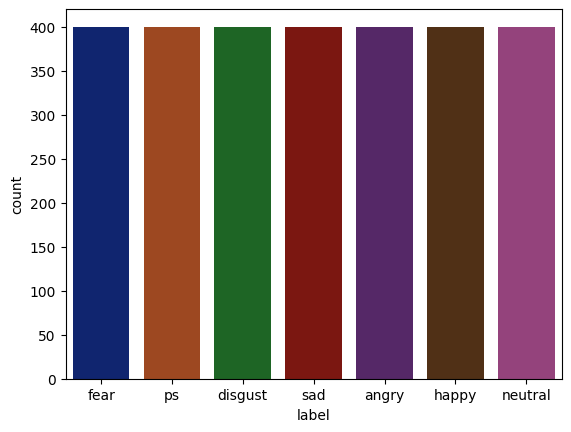

In [32]:
#using the Seaborn library to create a count plot, which visualizes the count of observations in each category
sns.countplot(x =df['label'], data=df , palette='dark')

**Loading and PLaying** the Audio data:

In [33]:
data, samplying_rate = librosa.load('/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav')
ipd.Audio('/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav')

**Visualizing** the Audio WaveForm:

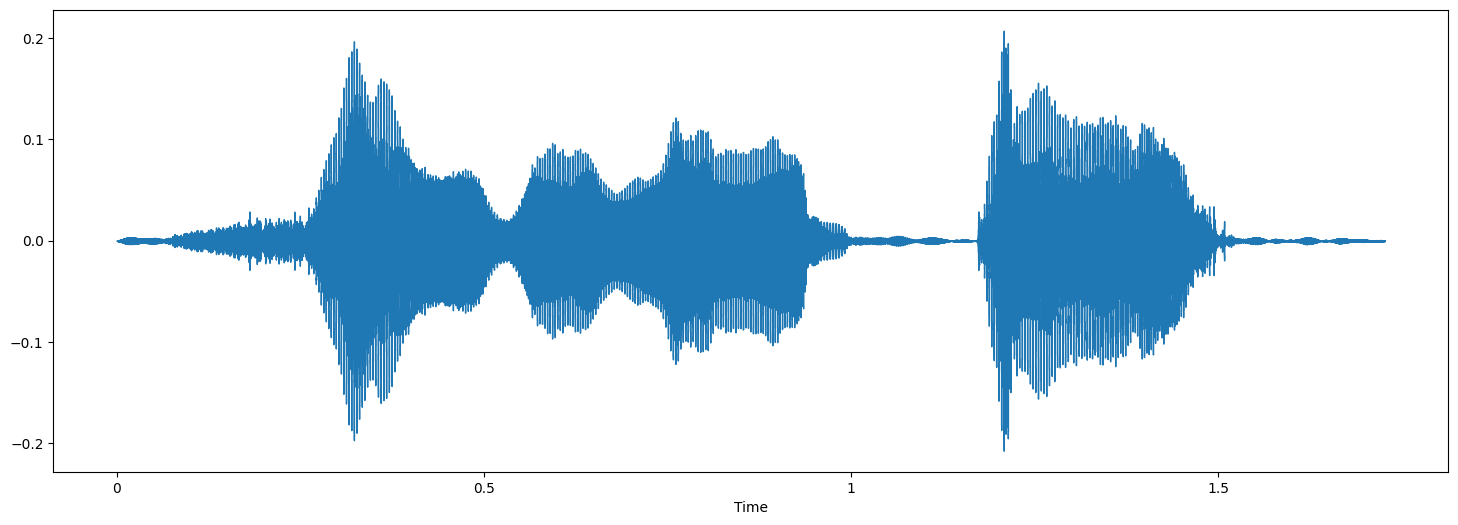

In [36]:
plt.figure(figsize =(18,6))
librosa.display.waveshow(data ,sr=samplying_rate)

**waveplot**: Visualizes the audio waveform, showing how the amplitude of the signal changes over time

**spectrogram**: Visualizes the frequency content of the audio signal over time

In [45]:
#Functions for the Audio Visualization

def waveplot(data, sr, emotion):
  plt.figure(figsize = (10,4))
  plt.title(emotion,size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.show()


def spectogram(data, sr, emotion):
  x= librosa.stft(data) #The librosa.stft(data) function returns a complex-valued array x, which represents the frequency components of the audio signal.
  x_db = librosa.amplitude_to_db(abs(x)) #The abs() function computes the magnitude (or absolute value) of these complex numbers.
  plt.figure(figsize=(10,4))
  plt.title(emotion,size=20)
  librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar(format='%+2.0f dB')
  plt.ylabel('Frequency (Hz)')
  plt.xlabel('Time (s)')
  plt.show()


**Emotion Speech Analysis** in the Extracted Label

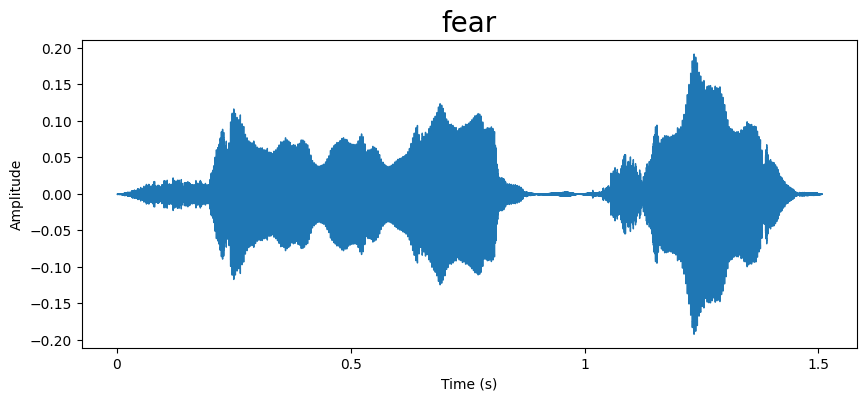

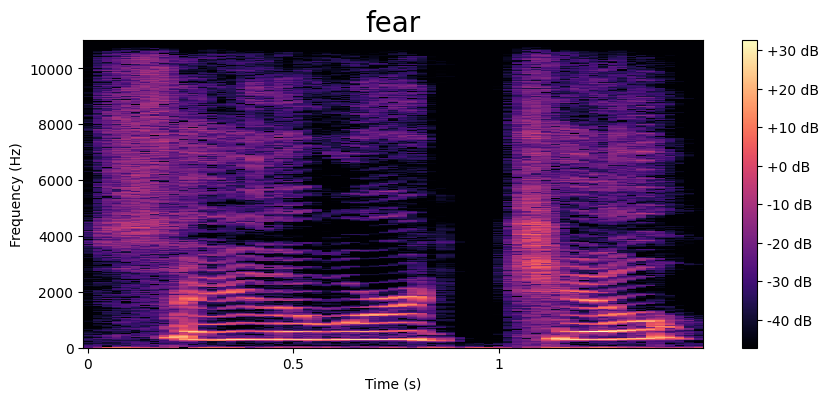

In [47]:
emotion = 'fear'

path = np.array(df['speech'][df['label'] == emotion])[1]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Visualize the waveform
waveplot(data, sampling_rate, emotion)

# Visualize the spectrogram
spectogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)

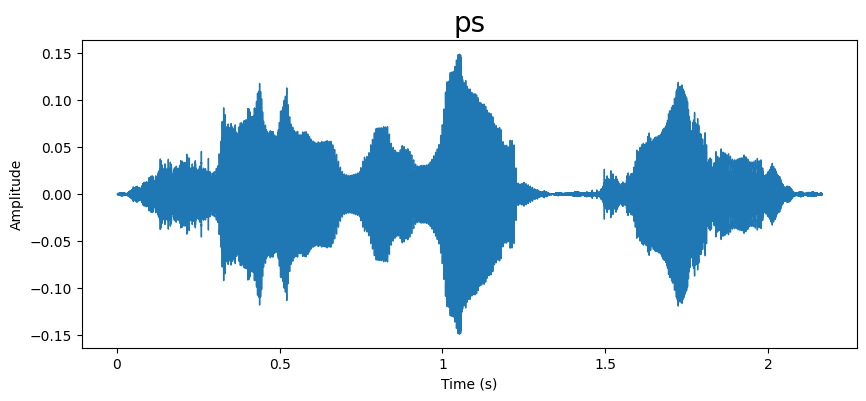

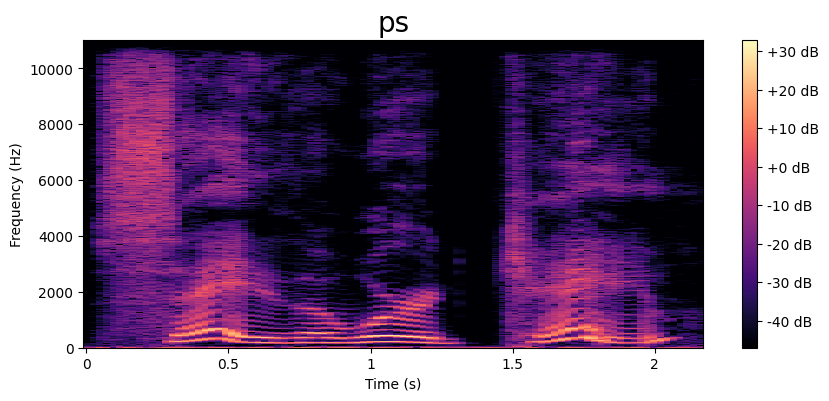

In [52]:
emotion = 'ps'

path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Visualize the waveform
waveplot(data, sampling_rate, emotion)

# Visualize the spectrogram
spectogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)

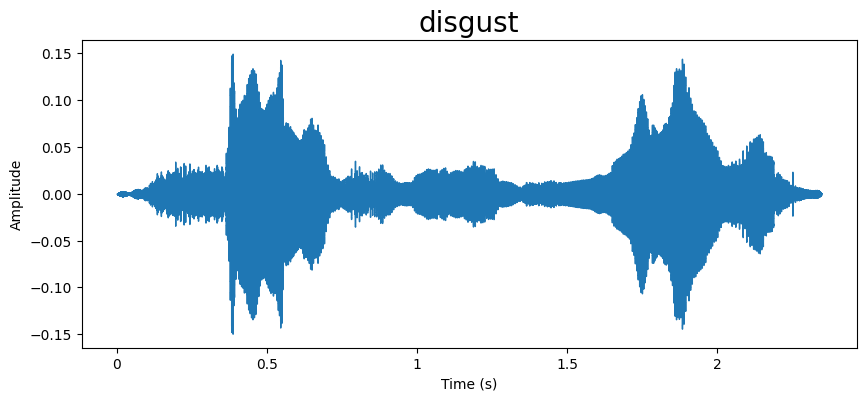

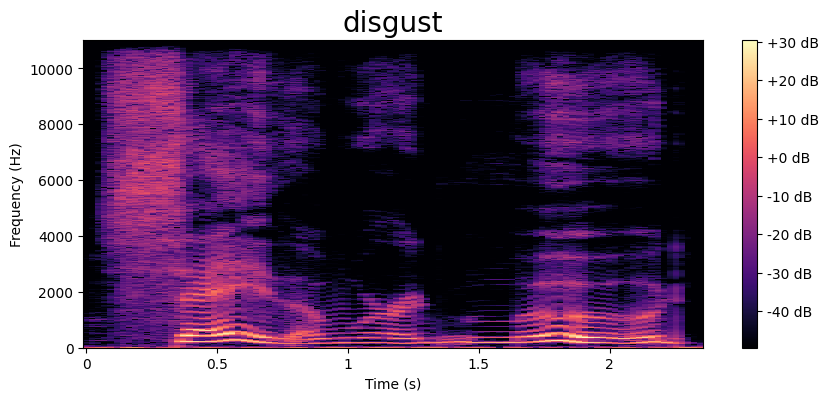

In [53]:
emotion = 'disgust'

path = np.array(df['speech'][df['label'] == emotion])[1]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Visualize the waveform
waveplot(data, sampling_rate, emotion)

# Visualize the spectrogram
spectogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)

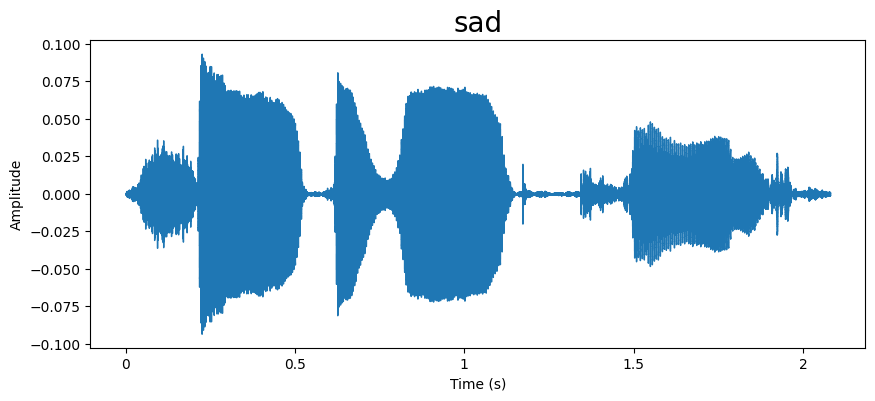

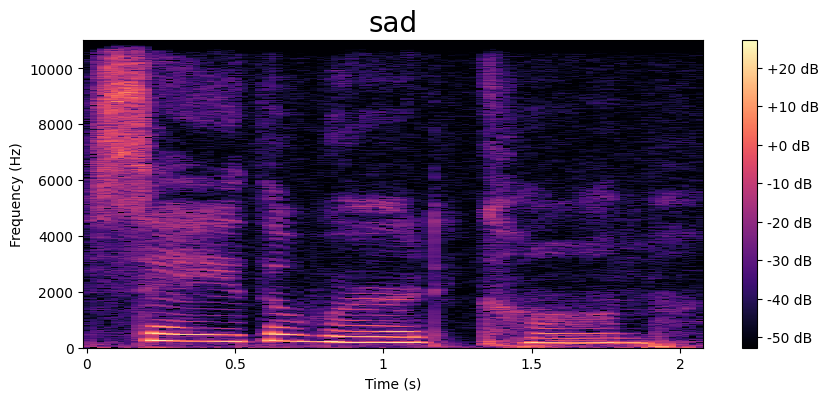

In [54]:
emotion = 'sad'

path = np.array(df['speech'][df['label'] == emotion])[1]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Visualize the waveform
waveplot(data, sampling_rate, emotion)

# Visualize the spectrogram
spectogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)

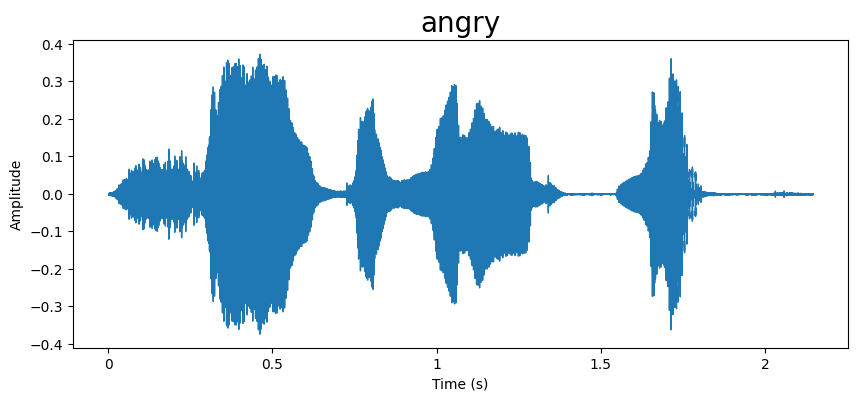

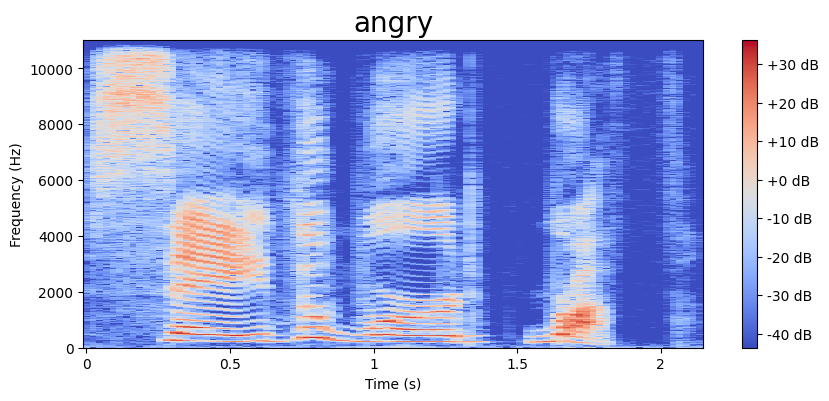

In [61]:
emotion = 'angry'

path = np.array(df['speech'][df['label'] == emotion])[3]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Visualize the waveform
waveplot(data, sampling_rate, emotion)

# Visualize the spectrogram
spectogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)

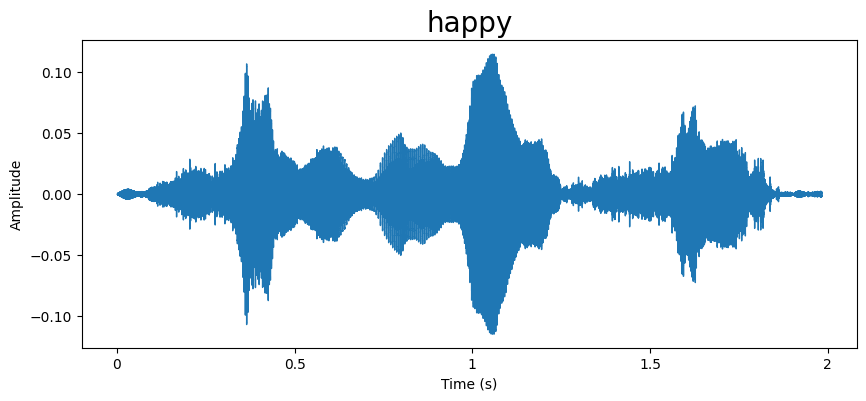

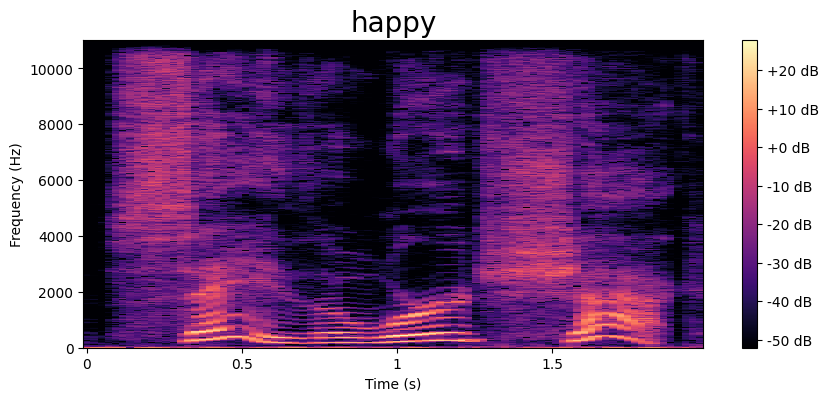

In [58]:
emotion = 'happy'

path = np.array(df['speech'][df['label'] == emotion])[1]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Visualize the waveform
waveplot(data, sampling_rate, emotion)

# Visualize the spectrogram
spectogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)

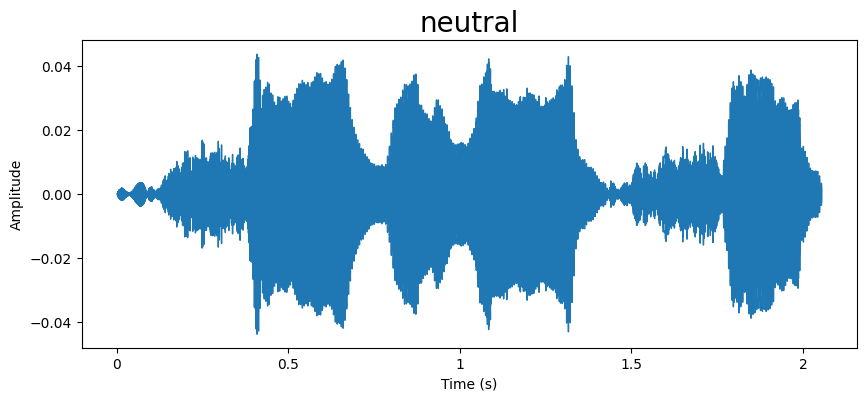

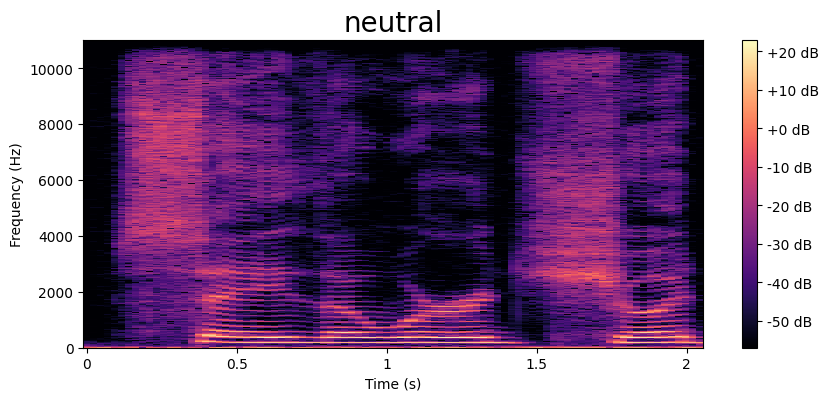

In [59]:
emotion = 'neutral'

path = np.array(df['speech'][df['label'] == emotion])[1]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Visualize the waveform
waveplot(data, sampling_rate, emotion)

# Visualize the spectrogram
spectogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)

**Feature Extraction** using MFCC

feature_extraction_mfcc function is designed to extract Mel-frequency cepstral coefficients (MFCCs) from an audio file

In [64]:
def feature_extraction_mfcc(filename):
  y, sr = librosa.load(filename,duration=3,offset=0.5)
  return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)


In [65]:
feature_extraction_mfcc(df['speech'][0])

array([-3.8848471e+02,  8.5043114e+01,  8.6716884e-01, -2.7837967e+01,
       -8.8677063e+00,  7.1472979e+00, -1.5750627e+01, -1.0009196e+01,
       -1.2533851e+01,  5.6503808e-01, -1.9401281e+01, -3.8784392e+00,
       -1.0701877e+01,  3.7973902e+00, -8.9457760e+00, -1.0899619e+00,
       -8.1259489e+00, -3.9357331e+00,  1.3164380e+00, -1.0090244e+01,
        9.4915638e+00,  3.0260523e+01,  2.6965569e+01,  3.6117321e+01,
        2.2489786e+01,  9.4233255e+00, -2.0324097e+00,  2.3527331e+00,
        2.5738335e-01,  1.4802642e+01, -3.6794357e+00, -5.7372746e+00,
       -2.2228878e+00, -3.9400878e+00,  3.9678237e+00,  1.9880340e+00,
       -7.3334265e+00, -4.9012036e+00, -2.7675805e+00, -1.4861958e+00],
      dtype=float32)

In [66]:
MFCC =df['speech'].apply(lambda x: feature_extraction_mfcc(x))


In [67]:
MFCC

,speech
0,"[-388.4847, 85.04311, 0.86716884, -27.837967, ..."
1,"[-433.5874, 69.54548, 7.016116, -5.76443, -7.2..."
2,"[-415.04907, 68.051796, 13.262637, -21.191761,..."
3,"[-452.84827, 99.645905, 10.672774, -24.341555,..."
4,"[-428.92374, 76.920586, 11.845303, -42.79665, ..."
...,...
2795,"[-341.70773, 86.204254, -1.6080027, -6.48541, ..."
2796,"[-359.0418, 28.117107, -11.621959, 17.04148, -..."
2797,"[-357.39175, 91.917496, -11.566878, -4.3486533..."
2798,"[-377.3896, 81.54513, -25.676172, -17.622133, ..."


In [75]:
X=[x for x in MFCC]
X=np.array(X)
X.shape

(2800, 40)

In [76]:
X=np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

One Hot Encoding

In [78]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])
y = y.toarray()

In [79]:
y.shape

(2800, 7)

**Splitting** the Data into Training and Testing Data:

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


**Creating a Speech Emotion Recognition Model** using LSTM
Long-Short Term Memory

In [95]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [98]:
history = model.fit(x_train,y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.2872 - loss: 1.6966 - val_accuracy: 0.7612 - val_loss: 0.6670
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.7247 - loss: 0.7098 - val_accuracy: 0.9174 - val_loss: 0.2433
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.8806 - loss: 0.3723 - val_accuracy: 0.9353 - val_loss: 0.2027
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.9104 - loss: 0.2857 - val_accuracy: 0.9531 - val_loss: 0.1546
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.9484 - loss: 0.1699 - val_accuracy: 0.9420 - val_loss: 0.1570
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.9469 - loss: 0.1690 - val_accuracy: 0.9397 - val_loss: 0.1637
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - accuracy: 0.9526 - loss: 0.1448 - val_accuracy: 0.9732 - val_loss: 0.0946
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.9669 - loss: 0.1087 - val_accuracy:

plotting the training and validation accuracy of a Keras model over multiple epochs.


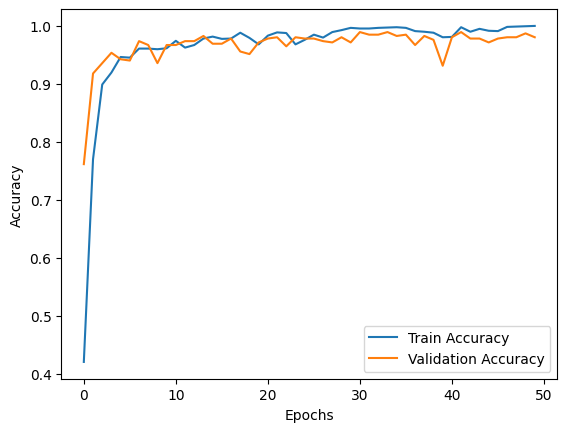

In [99]:
epochs = list(range(50))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


 visualizing the training and validation loss of a machine learning model over multiple epochs

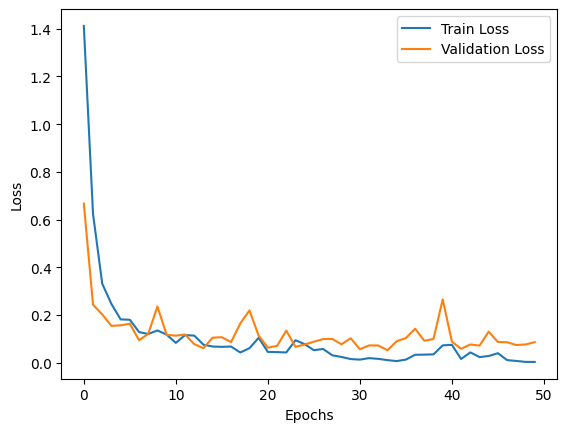

In [101]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Evaluating** the Model

In [102]:
model.evaluate(x_train,y_train)

70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9994 - loss: 0.0028


[0.018381789326667786, 0.9955357313156128]

**Predicting** the Model

In [103]:
y_pred = model.predict(x_test, batch_size=5)

112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


**Calculating the Accuracy Score**

In [105]:
Accuracy_score = model.evaluate(x_test, y_test)
print("Model Evaluation Accuracy:", round(Accuracy_score[1]*100), "%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9793 - loss: 0.1018
Model Evaluation Accuracy: 98 %


In [185]:
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))
model.save_weights('model_weights.weights.h5')

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.9979 - loss: 0.0067 - val_accuracy: 0.9786 - val_loss: 0.0925
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9839 - val_loss: 0.0654
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 135ms/step - accuracy: 1.0000 - loss: 5.4095e-04 - val_accuracy: 0.9857 - val_loss: 0.0607
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.9993 - loss: 0.0012 - val_accuracy: 0.9839 - val_loss: 0.0644
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 1.0000 - loss: 2.8215e-04 - val_accuracy: 0.9875 - val_loss: 0.0574
Epoch 6/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 1.0000 - loss: 3.1011e-04 - val_accuracy: 0.9875 - val_loss: 0.0597
Epoch 7/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9857 - val_loss: 0.0658
Epoch 8/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 1.0000 - loss: 1.4085e-

In [197]:
loaded_model.load_weights('model_weights.weights.h5')

**Saving the Trained Model**

In [106]:
save_dir = "Speech Recognition Project"
os.makedirs(save_dir, exist_ok=True)
os.Model_File = os.path.join(save_dir, "Speech_Emotion_Recoginition_Model.h5")
model.save('My_Model_File.keras')

In [107]:
model_name = 'Speech_Emotion_Recognition_model_LSTM.h5'
save_dir = os.path.join(os.getcwd(), 'train_model')

if not os.path.isdir(save_dir):
  os.makedirs(save_dir)
My_Model_Path = os.path.join(save_dir, model_name)
model.save('My_Model_path.keras')
print("saved the trained model at %s" % ('My_Model_Path.keras'))

saved the trained model at My_Model_Path.keras


saving the model as JSON

In [157]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [189]:
from keras.models import model_from_json

# Load model architecture from JSON file
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
print("Model architecture loaded from disk")

# Load weights into the model
loaded_model.load_weights('model_weights.weights.h5')  # Load the trained weights
print("Model weights loaded from disk")

# Compile the loaded model
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Evaluate the model on test data
score = loaded_model.evaluate(x_test, y_test, verbose=0)

# Print the accuracy
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1] * 100))  # Accuracy in percentage


Model architecture loaded from disk
Model weights loaded from disk
compile_metrics: 99.11%


From the Loaded Model we are going to **Predict the Emotion**

In [190]:
pred = loaded_model.predict(x_test, batch_size = 32, verbose =1)
pred

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


array([[1.3356606e-06, 1.1482992e-06, 4.0008032e-09, ..., 3.0207998e-09,
        9.9998695e-01, 2.1438879e-08],
       [1.2509282e-08, 1.1571473e-07, 6.4071581e-11, ..., 7.5396134e-09,
        9.9999958e-01, 6.1954782e-11],
       [6.3210452e-04, 3.6651582e-07, 1.2349442e-05, ..., 9.9935287e-01,
        2.2596123e-06, 4.3290487e-09],
       ...,
       [2.7127447e-07, 1.7156900e-08, 9.9999768e-01, ..., 4.7208610e-09,
        6.2948993e-07, 2.7910010e-09],
       [9.9999958e-01, 2.5407218e-07, 3.2874382e-08, ..., 1.2177781e-09,
        2.8170213e-08, 5.9690173e-08],
       [7.9120946e-05, 6.0181512e-04, 6.2721901e-06, ..., 5.6471251e-04,
        1.0815077e-04, 9.9849474e-01]], dtype=float32)

In [191]:
_pred=pred.argmax(axis =1)
_pred

array([5, 5, 4, 6, 4, 1, 5, 4, 1, 3, 1, 5, 6, 4, 0, 5, 5, 4, 4, 1, 4, 6,
       3, 6, 2, 1, 0, 6, 5, 2, 6, 5, 2, 0, 6, 5, 6, 0, 2, 4, 3, 1, 3, 0,
       3, 4, 1, 2, 0, 6, 3, 3, 5, 0, 5, 6, 4, 1, 1, 2, 2, 4, 0, 5, 5, 3,
       6, 4, 4, 3, 1, 2, 2, 6, 6, 5, 1, 5, 0, 0, 4, 1, 6, 1, 0, 2, 4, 4,
       2, 2, 4, 1, 5, 5, 1, 3, 1, 0, 4, 6, 1, 5, 0, 2, 6, 1, 2, 2, 0, 5,
       6, 2, 1, 2, 3, 2, 4, 3, 5, 5, 0, 3, 1, 0, 2, 2, 0, 3, 6, 4, 4, 0,
       0, 1, 1, 5, 0, 4, 3, 0, 5, 0, 1, 3, 3, 1, 6, 0, 4, 0, 2, 2, 6, 2,
       2, 5, 1, 4, 0, 6, 1, 0, 3, 4, 5, 0, 4, 5, 0, 1, 6, 5, 6, 3, 2, 1,
       3, 0, 3, 1, 4, 4, 1, 1, 3, 5, 3, 6, 4, 0, 2, 6, 4, 3, 3, 1, 5, 4,
       5, 5, 5, 3, 4, 5, 6, 3, 1, 4, 6, 2, 4, 1, 1, 3, 2, 4, 4, 0, 1, 5,
       4, 5, 0, 2, 4, 2, 3, 6, 6, 1, 5, 4, 6, 5, 1, 1, 5, 3, 6, 4, 4, 5,
       1, 1, 6, 5, 3, 2, 3, 1, 6, 3, 6, 0, 6, 0, 1, 3, 4, 3, 0, 4, 5, 4,
       1, 4, 0, 3, 0, 2, 3, 2, 3, 3, 6, 0, 0, 6, 3, 0, 2, 4, 2, 0, 0, 5,
       3, 1, 2, 6, 0, 5, 3, 4, 5, 1, 4, 4, 2, 6, 0,

In [192]:
z = _pred.astype(int).flatten()

# Inverse transform the integer-encoded labels back to their original form
prediction = encoder.inverse_transform(z.reshape(-1, 7))

# Create a DataFrame for the predicted labels
pred_data = pd.DataFrame({'Predicted Values': prediction.flatten()})

# Display the first 10 predictions
pred_data[:10]


,Predicted Values
0,happy
1,ps
2,disgust
3,angry
4,fear
5,disgust
6,happy
7,angry
8,angry
9,happy


Showing the Predicted Emotions for Test Data

In [193]:
actual = y_test.argmax(axis=1)
yz = actual.astype(int).flatten()

# Inverse transform the integer-encoded labels back to their original form
actual_values = (encoder.inverse_transform(yz.reshape(-1, 7)))

# Create a DataFrame for the predicted labels
actual_data = pd.DataFrame({'Actual Values': actual_values.flatten()})

# Display the first 10 predictions
actual_data[:10]

,Actual Values
0,happy
1,ps
2,disgust
3,angry
4,fear
5,disgust
6,happy
7,angry
8,angry
9,happy


In [194]:
final_data = actual_data.join(pred_data)
final_data

,Actual Values,Predicted Values
0,happy,happy
1,ps,ps
2,disgust,disgust
3,angry,angry
4,fear,fear
...,...,...
75,happy,happy
76,disgust,disgust
77,ps,ps
78,neutral,neutral


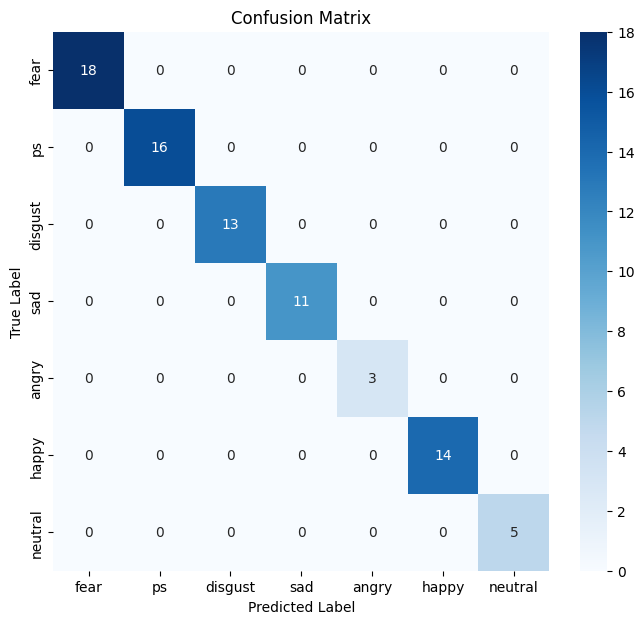

In [195]:
from sklearn.metrics import confusion_matrix
emotion = ['fear', 'ps', 'disgust', 'sad', 'angry', 'happy', 'neutral']

cm = confusion_matrix(actual_data, pred_data)

# Create a DataFrame for better labeling of the confusion matrix
cm_df = pd.DataFrame(cm, index=emotion, columns=emotion)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [196]:
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.99      0.98      0.98        87
           2       1.00      1.00      1.00        73
           3       1.00      0.97      0.99        73
           4       1.00      1.00      1.00        86
           5       0.98      1.00      0.99        79
           6       1.00      1.00      1.00        73

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560

